In [2]:
import math
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
def preprocess_text(doc):
    """Tokenize, remove stopwords, and convert to lowercase."""
    words = word_tokenize(doc.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return filtered_words

def compute_tf(doc):
    """Compute term frequency (TF)."""
    total_words = len(doc)
    tf_count = Counter(doc)
    return {word: count / total_words for word, count in tf_count.items()}

In [11]:
def compute_idf(processed_docs):
    """Compute inverse document frequency (IDF)."""
    N = len(processed_docs)
    idf_count = Counter()

    # Count document appearances for each word
    for doc in processed_docs:
        unique_words = set(doc)
        for word in unique_words:
            idf_count[word] += 1

    # Compute IDF using the formula log(N / frequency)
    return {word: math.log(N / count) for word, count in idf_count.items()}

In [12]:
def compute_tfidf(tf_scores, idf_values):
    """Compute TF-IDF scores."""
    return {word: tf_scores.get(word, 0) * idf_values.get(word, 0) for word in tf_scores}

def bag_of_words(processed_docs):
    """Create a Bag of Words (BoW) representation."""
    vocab = set(word for doc in processed_docs for word in doc)
    bow_list = []
    for doc in processed_docs:
        bow_list.append({word: doc.count(word) for word in vocab})
    return bow_list


In [16]:
def generate_wordcloud(text):
    """Generate and display a Word Cloud."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example text corpus
documents = [
    "I like NLP subject",
    "NLP stands for Natural Language Processing",
    "Language models are very important for NLP applications"
]

# Preprocess the documents
processed_docs = [preprocess_text(doc) for doc in documents]


In [17]:
# Compute TF, IDF, and TF-IDF
tf_list = [compute_tf(doc) for doc in processed_docs]
idf_values = compute_idf(processed_docs)
tfidf_scores_list = [compute_tfidf(tf, idf_values) for tf in tf_list]


In [18]:
# Display Results
print("Processed Documents:", processed_docs)
print("\nTF Scores:", tf_list)
print("\nIDF Values:", idf_values)
print("\nTF-IDF Scores:", tfidf_scores_list)

Processed Documents: [['like', 'nlp', 'subject'], ['nlp', 'stands', 'natural', 'language', 'processing'], ['language', 'models', 'important', 'nlp', 'applications']]

TF Scores: [{'like': 0.3333333333333333, 'nlp': 0.3333333333333333, 'subject': 0.3333333333333333}, {'nlp': 0.2, 'stands': 0.2, 'natural': 0.2, 'language': 0.2, 'processing': 0.2}, {'language': 0.2, 'models': 0.2, 'important': 0.2, 'nlp': 0.2, 'applications': 0.2}]

IDF Values: {'like': 1.0986122886681098, 'subject': 1.0986122886681098, 'nlp': 0.0, 'language': 0.4054651081081644, 'processing': 1.0986122886681098, 'stands': 1.0986122886681098, 'natural': 1.0986122886681098, 'models': 1.0986122886681098, 'important': 1.0986122886681098, 'applications': 1.0986122886681098}

TF-IDF Scores: [{'like': 0.3662040962227032, 'nlp': 0.0, 'subject': 0.3662040962227032}, {'nlp': 0.0, 'stands': 0.21972245773362198, 'natural': 0.21972245773362198, 'language': 0.08109302162163289, 'processing': 0.21972245773362198}, {'language': 0.081093

In [19]:
# Bag of Words representation
bow_representation = bag_of_words(processed_docs)
print("\nBag of Words Representation:", bow_representation)


Bag of Words Representation: [{'language': 0, 'models': 0, 'important': 0, 'like': 1, 'subject': 1, 'processing': 0, 'applications': 0, 'nlp': 1, 'stands': 0, 'natural': 0}, {'language': 1, 'models': 0, 'important': 0, 'like': 0, 'subject': 0, 'processing': 1, 'applications': 0, 'nlp': 1, 'stands': 1, 'natural': 1}, {'language': 1, 'models': 1, 'important': 1, 'like': 0, 'subject': 0, 'processing': 0, 'applications': 1, 'nlp': 1, 'stands': 0, 'natural': 0}]


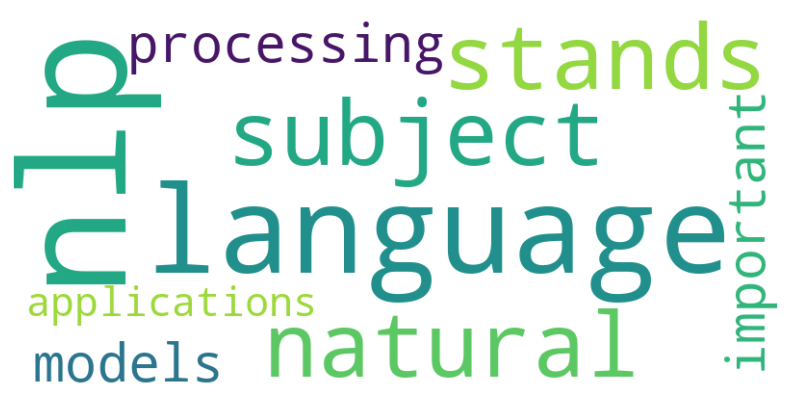

In [20]:
# Generate Word Cloud for the entire corpus
generate_wordcloud(' '.join([' '.join(doc) for doc in processed_docs]))